## Introduction to regression with neural network with tensorflow
 Regression is predcting the dependent variable outcome on the basis of number of independent variable

In [1]:
import tensorflow as tf

## Creating data to view and fit

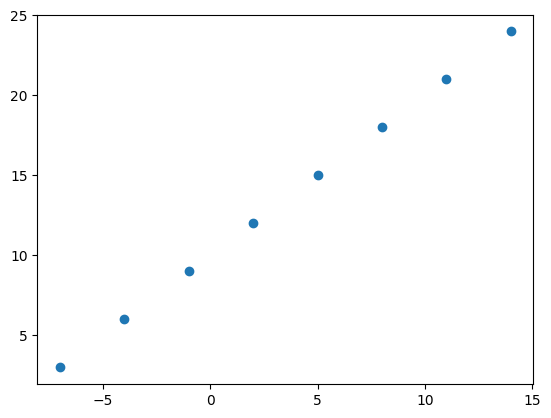

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
Y=np.arange(start=3.0,stop=27.0,step=3.0)
plt.scatter(X,Y)

In [5]:
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [6]:
# Create a demo tensor for housing price prediction problem
House_info=tf.constant(["bedrooms","bathrooms","garages"])
House_price=tf.constant([939700])
House_info,House_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrooms', b'bathrooms', b'garages'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with tensorflow
1.** Creating a Model**- define input and output layers, hidden layers
2. **Compile a model** -define loss function, optimizer and evaluation matrix
3. **Fitting a model**- letting the model try to find pattern between X and y

In [10]:
X=tf.constant(X)
Y=tf.constant(Y)
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [18]:
X=tf.reshape(X, shape=(8,1))
Y=tf.reshape(Y, shape=(8,1))

In [23]:
# Create a model using Sequential API

model =tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
    )
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
model.fit(X, Y, epochs = 20)

Epoch 1/20
1/1 [==============================] - 1s 794ms/step - loss: 7.5000 - mae: 7.5000
Epoch 2/20
1/1 [==============================] - 0s 22ms/step - loss: 7.4944 - mae: 7.4944
Epoch 3/20
1/1 [==============================] - 0s 22ms/step - loss: 7.4888 - mae: 7.4888
Epoch 4/20
1/1 [==============================] - 0s 28ms/step - loss: 7.4831 - mae: 7.4831
Epoch 5/20
1/1 [==============================] - 0s 19ms/step - loss: 7.4775 - mae: 7.4775
Epoch 6/20
1/1 [==============================] - 0s 27ms/step - loss: 7.4719 - mae: 7.4719
Epoch 7/20
1/1 [==============================] - 0s 18ms/step - loss: 7.4662 - mae: 7.4662
Epoch 8/20
1/1 [==============================] - 0s 13ms/step - loss: 7.4606 - mae: 7.4606
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 7.4550 - mae: 7.4550
Epoch 10/20
1/1 [==============================] - 0s 32ms/step - loss: 7.4494 - mae: 7.4494
Epoch 11/20
1/1 [==============================] - 0s 19ms/step - loss: 7.4438

In [24]:
# Try and make prediction using our model
model.predict([[17.0]])

1/1 [==============================] - 0s 101ms/step


array([[29.41565]], dtype=float32)

### Improving our model

We can improce our model, by altering the steps we took to create a model.

1. **Creating a model** - we might add more laers, increase number of hidden units within each hidden layer, change the activation function of hidden layers, change the activation function of each layers
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of optimization function.
3. **Fitting a model** - more epochs or train on more data?

In [30]:
model=tf.keras.Sequential([tf.keras.layers.Dense(100, activation ="relu"),
                           tf.keras.layers.Dense(100, activation ="relu"),
                           tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"]
              )
model.fit(X, Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 822ms/step - loss: 13.4217 - mae: 13.4217
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.1134 - mae: 13.1134
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8081 - mae: 12.8081
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5051 - mae: 12.5051
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2065 - mae: 12.2065
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9093 - mae: 11.9093
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6113 - mae: 11.6113
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3165 - mae: 11.3165
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0240 - mae: 11.0240
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7307 - mae: 10.7307
Epoch 11/100
1/1 [==============================

In [31]:
model.predict([[17.0]])
# model is overfitting

1/1 [==============================] - 0s 212ms/step


array([[31.500643]], dtype=float32)

In [45]:
model=tf.keras.Sequential([tf.keras.layers.Dense(50,activation= None),
                           tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
              )
model.fit(X, Y, epochs = 100)
# lr is the most important hyperparameters

Epoch 1/100
1/1 [==============================] - 1s 799ms/step - loss: 12.8900 - mae: 12.8900
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8247 - mae: 12.8247
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7593 - mae: 12.7593
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.6940 - mae: 12.6940
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6286 - mae: 12.6286
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5631 - mae: 12.5631
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.4977 - mae: 12.4977
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 12.4321 - mae: 12.4321
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 12.3665 - mae: 12.3665
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 12.3008 - mae: 12.3008
Epoch 11/100
1/1 [==============================

In [46]:
model.predict([[17.0]])

1/1 [==============================] - 0s 80ms/step


array([[31.98673]], dtype=float32)

In [26]:
model=tf.keras.Sequential([tf.keras.layers.Dense(100, activation ="relu"),
                           tf.keras.layers.Dense(100, activation = "relu"),
                           tf.keras.layers.Dense(100, activation = "relu"),
                           tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"]
              )
model.fit(X, Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.6923 - mae: 13.6923
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 13.4051 - mae: 13.4051
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 13.1524 - mae: 13.1524
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 12.9154 - mae: 12.9154
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 12.6874 - mae: 12.6874
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 12.4690 - mae: 12.4690
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 12.2449 - mae: 12.2449
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 12.0205 - mae: 12.0205
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 11.7934 - mae: 11.7934
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 11.5898 - mae: 11.5898
Epoch 11/100
1/1 [==============================] -

## Evaluating a model
In practice, workflow is following

``` Build a model -> fit it -> evaluate it -> tweak a model ->fit it -> evaluate it -> tweak it```

When it comes to evaluate your model, you shouls always
> "Visualiza, Visualize, Visualize"

In [51]:
# Make a bigger dataset
X=tf.range(-100,100,4)
Y=X+10

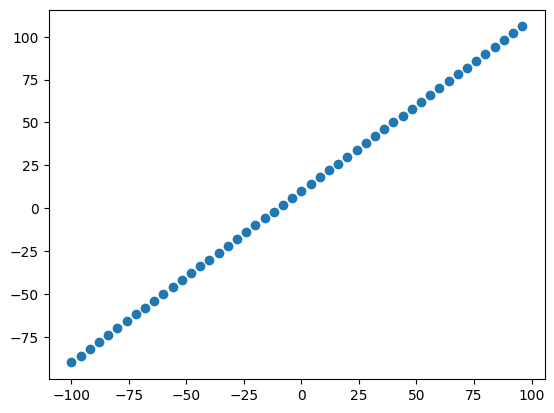

In [53]:
# Visualize data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

3 subsets, train, test and validation set

In [54]:
# Check the length of how many samples we have
len(X)

50

In [55]:
X_train = X[:40]
X_test  = X[40:]
Y_train = Y[:40]
Y_test  = Y[40:]

### Visualizing the data


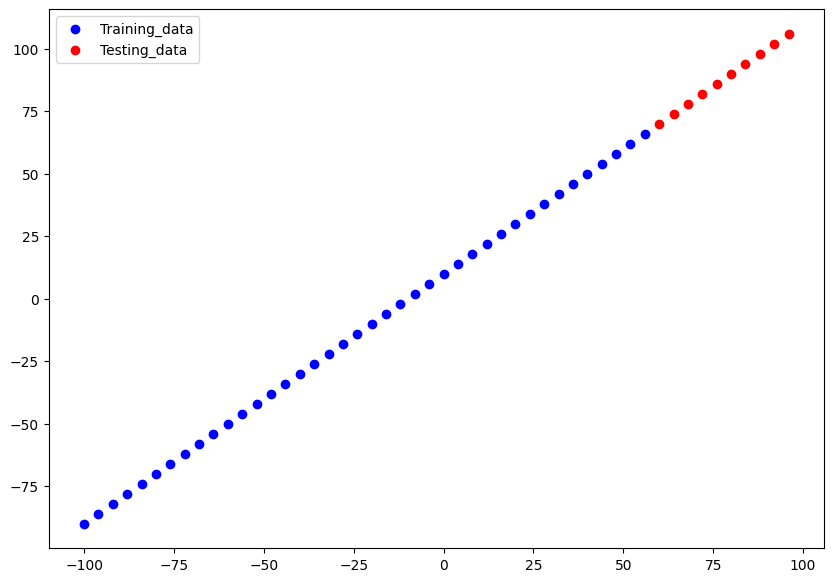

In [58]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train,Y_train, c="b", label="Training_data")
plt.scatter(X_test,Y_test, c="r", label="Testing_data")
plt.legend()

In [67]:
X_train=tf.reshape(X_train, shape=(40,1))
Y_train=tf.reshape(Y_train, shape=(40,1))

In [85]:
model=tf.keras.Sequential([tf.keras.layers.Dense(100),
                           tf.keras.layers.Dense(50),
                           tf.keras.layers.Dense(25),
                           tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01))
model.fit(X_train,Y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 24.2167
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 12.1120
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 10.1942
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.7209
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8866
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5271
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 8.8365
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8667
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4213
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 7.3527
Epoch 12/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1222
Epoch 13/100
2/2 [==============================] - 0

In [70]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 100)               200       
                                                                 
 dense_41 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


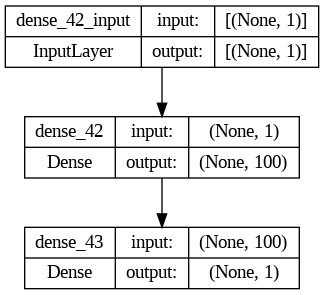

In [74]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

In [86]:
# Make some prediction
y_pred=model.predict(X_test)
y_pred


1/1 [==============================] - 0s 80ms/step


array([[ 67.985214],
       [ 71.89254 ],
       [ 75.79987 ],
       [ 79.70721 ],
       [ 83.61455 ],
       [ 87.52188 ],
       [ 91.4292  ],
       [ 95.33654 ],
       [ 99.24388 ],
       [103.15119 ]], dtype=float32)

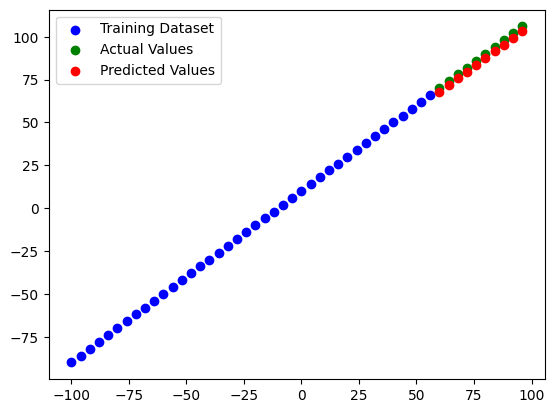

In [87]:
plt.scatter(X_train, Y_train, color="b", label="Training Dataset")
plt.scatter(X_test, Y_test, color="g", label="Actual Values")
plt.scatter(X_test, y_pred, color="r", label="Predicted Values")
plt.legend()

In [115]:
def plot_preds(predictions=y_pred):
  plt.scatter(X_train, Y_train, color="b", label="Training Dataset")
  plt.scatter(X_test, Y_test, color="g", label="Actual Values")
  plt.scatter(X_test, predictions, color="r", label="Predicted Values")
  plt.legend()

In [88]:
### Evaluating our model's prediction with regression evaluation metrics

In [89]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 264ms/step - loss: 2.4318


2.4317917823791504

In [97]:
# Calculate MAE
mae=tf.metrics.mean_absolute_error(Y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.4317925>

In [99]:
# Calculate MSE
mse=tf.metrics.mean_squared_error(Y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.98446>

In [95]:
y_pred=tf.squeeze(tf.constant(y_pred))

In [96]:
Y_test.shape,y_pred.shape

(TensorShape([10]), TensorShape([10]))

In [101]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true, y_pred)

In [121]:
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true, y_pred)

### Running experiments to improve our modelRunning experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1.Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2.Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3.Train for longer - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.
`Build model_1`

In [107]:
tf.random.set_seed(42)
# Crete the model
model_1=tf.keras.Sequential([tf.keras.layers.Dense(1)])
# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#Fit the model
model_1.fit(X_train,Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 62.3120 - mae: 62.3120
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4189 - mae: 27.4189
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1472 - mae: 11.1472
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5482 - mae: 9.5482
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4516 - mae: 10.4516
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6826 - mae: 9.6826
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7835 - mae: 8.7835
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0778 - mae: 9.0778
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 19.2547 - mae: 19.2547
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4057 - mae: 10.4057
Epoch 11/100
2/2 [==============================] - 0s 9ms/step 

1/1 [==============================] - 0s 58ms/step


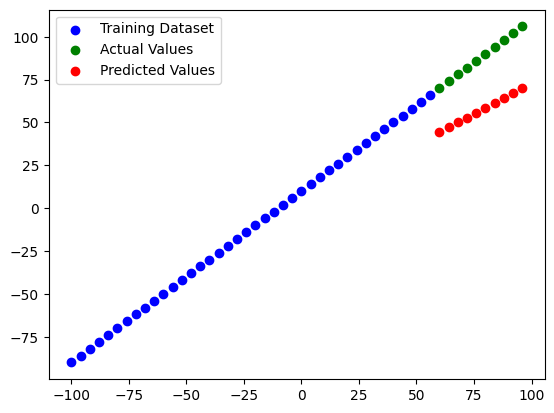

In [128]:
# Make and plot predictions for model1
y_preds_1=model_1.predict(X_test)
plot_preds(predictions=y_preds_1)

In [123]:
# Model 1 evaluation
mae_1=mae(Y_test, tf.squeeze(tf.constant(y_preds_1)))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=23.622955>



`Build model 2`


2 Dense layers trained for 100 epochs

In [ ]:
tf.random.set_seed(42)
# Crete the model
model_2=tf.keras.Sequential([tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)])
# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
#Fit the model
model_2.fit(X_train,Y_train, epochs=100)

1/1 [==============================] - 0s 23ms/step


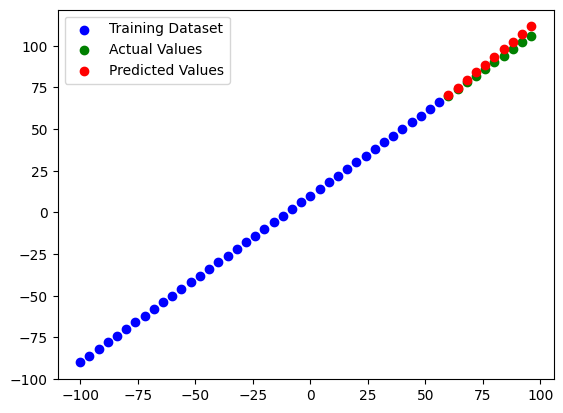

In [129]:
# Make and plot predictions for model1
y_preds_2=model_2.predict(X_test)
plot_preds(predictions=y_preds_2)

In [130]:
# Model 2 evaluation
mae_2=mae(Y_test, tf.squeeze(tf.constant(y_preds_2)))
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=2.940229>

`Build model 3`

2 layers trained for 500 epochs

In [131]:
tf.random.set_seed(42)
# Crete the model
model_3=tf.keras.Sequential([tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)])
# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#Fit the model
model_3.fit(X_train,Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 25ms/step - loss: 26.2520 - mae: 26.2520
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 24.6447 - mae: 24.6447
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 28.6440 - mae: 28.6440
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 16.4764 - mae: 16.4764
Epoch 5/500
2/2 [==============================] - 0s 14ms/step - loss: 19.1482 - mae: 19.1482
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 13.4387 - mae: 13.4387
Epoch 7/500
2/2 [==============================] - 0s 18ms/step - loss: 12.6264 - mae: 12.6264
Epoch 8/500
2/2 [==============================] - 0s 17ms/step - loss: 11.0668 - mae: 11.0668
Epoch 9/500
2/2 [==============================] - 0s 15ms/step - loss: 39.8683 - mae: 39.8683
Epoch 10/500
2/2 [==============================] - 0s 16ms/step - loss: 27.3409 - mae: 27.3409
Epoch 11/500
2/2 [==============================]

1/1 [==============================] - 0s 99ms/step


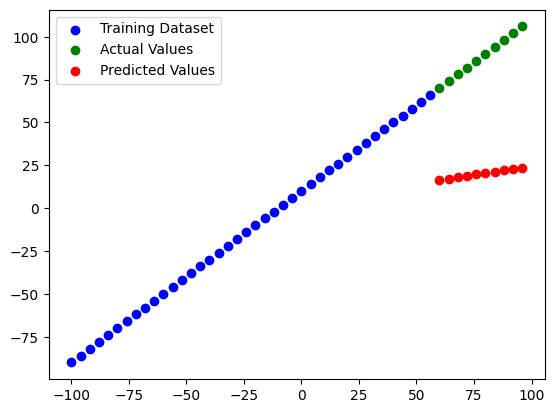

In [132]:
# Make and plot predictions for model1
y_preds_3=model_3.predict(X_test)
plot_preds(predictions=y_preds_3)

In [133]:
# Model 2 evaluation
mae_3=mae(Y_test, tf.squeeze(tf.constant(y_preds_3)))
mae_3
#### Model is Overfitting ###

<tf.Tensor: shape=(), dtype=float32, numpy=67.93838>

### Comparing the results of our experiments

In [135]:
import pandas as pd
model_results=[["model_1", mae_1.numpy()],["model_2", mae_2.numpy()],["model_3", mae_3.numpy()]]
all_results=pd.DataFrame(model_results, columns=["model name","mae"])
all_results

,model name,mae
0,model_1,23.622955
1,model_2,2.940229
2,model_3,67.938377


### Saving our model
There are two main formats:
1. The SavedModel format
2. The HDF5 format (Universal format)

In [136]:
model_2.save("best_model_SavedModel_format")

In [137]:
model_2.save("best_model_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model


In [142]:
loaded_saved_model=tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                20        
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [144]:
# Compare model2 predictions with loaded saved model predictions
model_2_preds=model_2.predict(X_test)
loaded_saved_model_preds=loaded_saved_model.predict(X_test)
model_2_preds==loaded_saved_model_preds

1/1 [==============================] - 0s 48ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model from google colab

In [ ]:
from google.colab import files
files.download("path to model hdf")

In [ ]:
# save file from colab to drive
!cp "path on colab" "path on google drive"

## A larger example

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [2]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance["sex"], insurance["smoker"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object)

In [9]:
# some columns are numeric, some are non numeric, we have to convert the data to numeric encoding
# for one hot encoding, simple method in pandas
insurance_one_hot=pd.get_dummies(insurance)

In [18]:
#Create X and Y values (feature and labels)
X=insurance_one_hot.drop("charges", axis=1)
Y=insurance_one_hot["charges"]

In [19]:
tf.shape(X)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1338,   11], dtype=int32)>

### Create train and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, y_train.shape

((1070, 11), (1070,))

### Creation of Model

In [37]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.001),
                        metrics=["mae"])
insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13315.7139 - mae: 13315.7139
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13162.8770 - mae: 13162.8770
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12843.6055 - mae: 12843.6055
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12209.8486 - mae: 12209.8486
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11127.4443 - mae: 11127.4443
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9697.8975 - mae: 9697.8975
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8326.7529 - mae: 8326.7529
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.4082 - mae: 7595.4082
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7454.6562 - mae: 7454.6562
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7431.8711 - mae:

In [38]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.001),
                        metrics=["mae"])
history = insurance_model_2.fit(X_train,y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13281.1230 - mae: 13281.1230
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13102.7725 - mae: 13102.7725
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12738.6904 - mae: 12738.6904
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12033.7012 - mae: 12033.7012
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10872.0791 - mae: 10872.0791
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9423.2266 - mae: 9423.2266
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8132.1870 - mae: 8132.1870
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7527.5151 - mae: 7527.5151
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.8481 - mae: 7429.8481
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7410.1392 - mae:

In [39]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3494.2007 - mae: 3494.2007


[3494.20068359375, 3494.20068359375]

Text(0.5, 0, 'epochs')

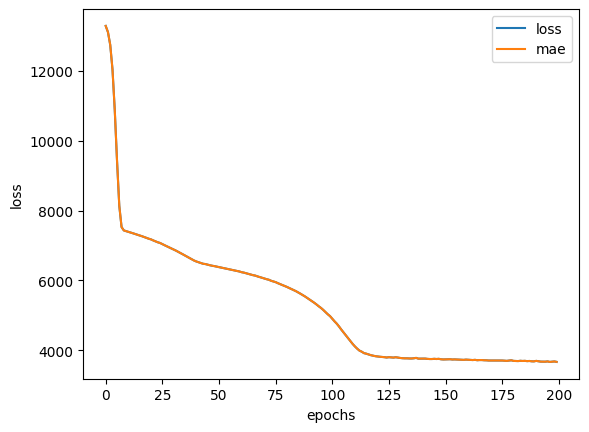

In [45]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### When should we stop the training, no of epochs
There is a mechanism called early stopping callbacks


Early stopping is a strategy for avoiding “overtraining” your model

Stop training when a monitored metric has stopped improving

```tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
 )```

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tends to perform standardization

In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                           (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"]))

# Create X and Y
X = insurance.drop("charges",axis=1)
Y= insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
ct.fit(X_train,X_test)
X_normal_train=ct.transform(X_train)
X_normal_test=ct.transform(X_test)


In [61]:
tf.random.set_seed(42)
insurance_model_4=tf.keras.Sequential([
                                     tf.keras.layers.Dense(100),
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.001),
                        metrics=["mae"])
history = insurance_model_4.fit(X_normal_train,y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13343.8545 - mae: 13343.8545
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13335.3623 - mae: 13335.3623
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13314.2490 - mae: 13314.2490
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13269.6230 - mae: 13269.6230
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13190.4531 - mae: 13190.4531
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13065.7646 - mae: 13065.7646
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12885.1816 - mae: 12885.1816
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12638.6299 - mae: 12638.6299
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12315.9473 - mae: 12315.9473
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11913.45

In [62]:
insurance_model_4.evaluate(X_normal_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.4038 - mae: 3170.4038


[3170.40380859375, 3170.40380859375]